In [512]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [513]:
ds1=pd.read_csv('sonar_csv.csv')

In [514]:
ds1

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine


In [515]:
ds=pd.read_csv('sonar_csv.csv',names=range(0,61),header=0)
ds

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine


In [516]:
print(ds.shape)
print(ds.dtypes)
print(ds.head(20))
print(ds.tail(25))
print(ds.describe())

(208, 61)
0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object
        0       1       2       3       4       5       6       7       8   \
0   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1   0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2   0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3   0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4   0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5   0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6   0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7   0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8   0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9   0.0164  0.0173  0.0347  0.

In [517]:
print(ds.groupby(60).size())

60
Mine    111
Rock     97
dtype: int64


In [518]:
import matplotlib.pyplot as plt

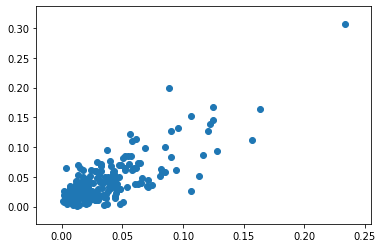

In [519]:
plt.scatter(ds.iloc[:,1],ds.iloc[:,2])
plt.show()

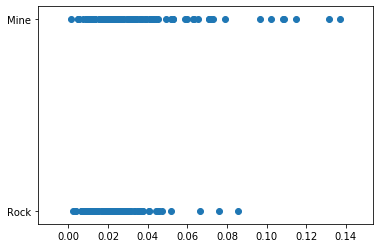

In [520]:
plt.scatter(ds.iloc[:,0],ds.iloc[:,-1])
plt.show()

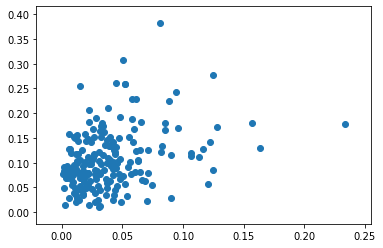

In [521]:
plt.scatter(ds.iloc[:,1],ds.iloc[:,5])
plt.show()

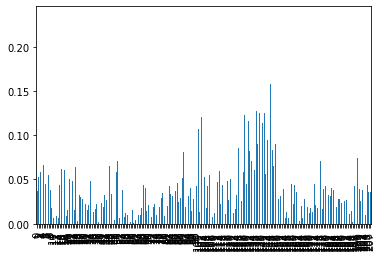

In [522]:
ds[1].plot.bar()

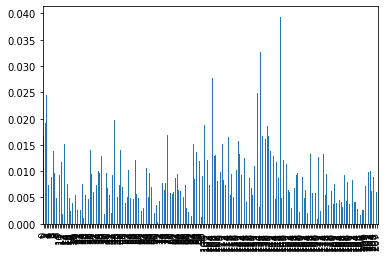

In [523]:
ds[55].plot.bar()

In [524]:
x=ds.iloc[:,0:-1]
x.shape

(208, 60)

In [525]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)

In [526]:
y=ds.iloc[:,-1]
y.shape

(208,)

In [527]:
x=pca.fit_transform(x)

In [528]:
x.shape

(208, 10)

In [529]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277
...,...,...,...,...,...,...,...,...,...,...
203,0.041781,-1.031644,0.265669,0.021516,-0.015439,0.097304,0.003784,0.177926,-0.027908,-0.264179
204,0.219149,-1.153807,0.203619,0.045836,0.183272,0.012770,0.078507,0.264831,0.070749,-0.303296
205,0.297733,-1.151860,0.250096,-0.057702,0.163566,0.015275,0.045792,0.225904,0.072130,-0.313044
206,-0.045761,-0.995970,0.199677,-0.066516,-0.147227,-0.084600,0.031038,0.067444,0.025771,-0.171120


In [530]:
y

0      Rock
1      Rock
2      Rock
3      Rock
4      Rock
       ... 
203    Mine
204    Mine
205    Mine
206    Mine
207    Mine
Name: 60, Length: 208, dtype: object

In [531]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [532]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=55)

In [533]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]

In [534]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score of',m,'is : ')
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is : 
0.8333333333333334
[[23  4]
 [ 3 12]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.75      0.80      0.77        15

    accuracy                           0.83        42
   macro avg       0.82      0.83      0.82        42
weighted avg       0.84      0.83      0.83        42



Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is : 
0.7619047619047619
[[23  4]
 [ 6  9]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.69      0.60      0.64        15

    accuracy

In [535]:
LOR=LogisticRegression()
GNB=GaussianNB()
SVC=SVC()
DTC=DecisionTreeClassifier(random_state=10)
KNN=KNeighborsClassifier()

In [536]:
models= []
models.append(('LogisticRegression',LOR))
models.append(('GaussianNB',GNB))
models.append(('SVC',SVC))
models.append(('DecisionTreeClassifier',DTC))
models.append(('KNeighborsClassifie',KNN))

**************** LogisticRegression ****************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY SCORE IS =  0.8333333333333334


CROSS_VAL_SCORE =  0.6678571428571429


ROC_AUC_SCORE =  0.825925925925926


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.75      0.80      0.77        15

    accuracy                           0.83        42
   macro avg       0.82      0.83      0.82        42
weighted avg       0.84      0.83      0.83        42



CONFUSION MATRIX [[23  4]
 [ 3 12]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


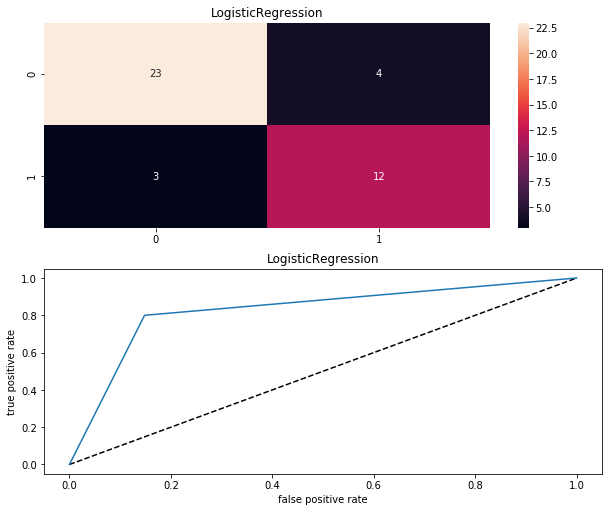




**************** GaussianNB ****************


GaussianNB(priors=None, var_smoothing=1e-09)


ACCURACY SCORE IS =  0.7619047619047619


CROSS_VAL_SCORE =  0.6104761904761905


ROC_AUC_SCORE =  0.725925925925926


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.69      0.60      0.64        15

    accuracy                           0.76        42
   macro avg       0.74      0.73      0.73        42
weighted avg       0.76      0.76      0.76        42



CONFUSION MATRIX [[23  4]
 [ 6  9]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


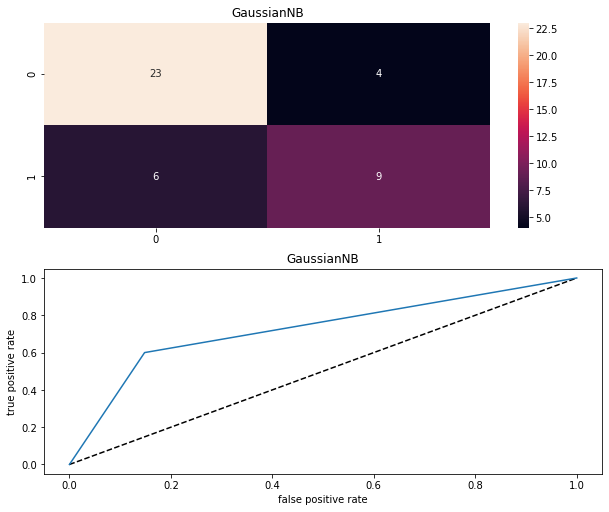




**************** SVC ****************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


ACCURACY SCORE IS =  0.9047619047619048


CROSS_VAL_SCORE =  0.6345238095238095


ROC_AUC_SCORE =  0.8814814814814815


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.92      0.80      0.86        15

    accuracy                           0.90        42
   macro avg       0.91      0.88      0.89        42
weighted avg       0.91      0.90      0.90        42



CONFUSION MATRIX [[26  1]
 [ 3 12]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


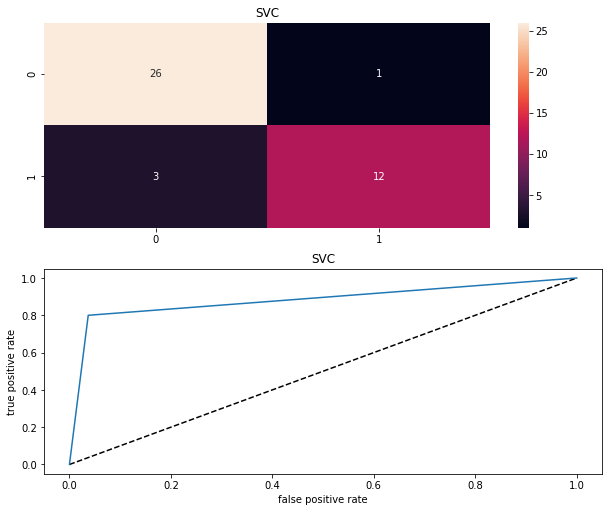




**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')


ACCURACY SCORE IS =  0.8333333333333334


CROSS_VAL_SCORE =  0.5833333333333333


ROC_AUC_SCORE =  0.825925925925926


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.75      0.80      0.77        15

    accuracy                           0.83        42
   macro avg       0.82      0.83      0.82        42
weighted avg       0.84      0.83      0.83        42



CONFUSION MATRIX [[23  4]
 [ 3 12]]




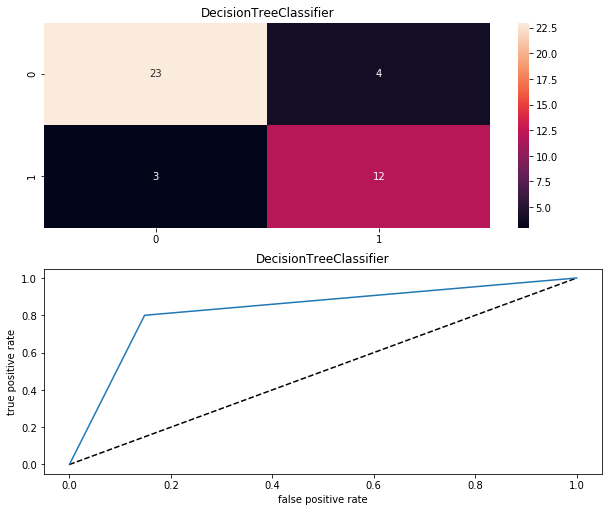




**************** KNeighborsClassifie ****************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


ACCURACY SCORE IS =  0.7619047619047619


CROSS_VAL_SCORE =  0.6052380952380954


ROC_AUC_SCORE =  0.7407407407407407


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.67      0.67      0.67        15

    accuracy                           0.76        42
   macro avg       0.74      0.74      0.74        42
weighted avg       0.76      0.76      0.76        42



CONFUSION MATRIX [[22  5]
 [ 5 10]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


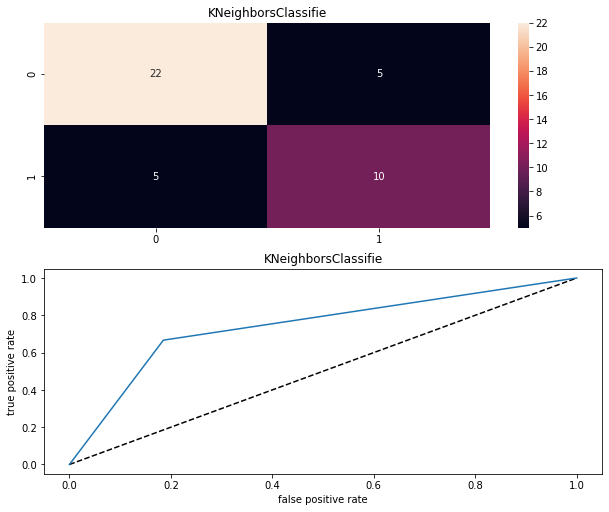

In [537]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('****************',name,'****************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS= accuracy_score(y_test,pred)
    print('ACCURACY SCORE IS = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('CROSS_VAL_SCORE = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_SCORE = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('CLASSIFICATION REPORT = ',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('CONFUSION MATRIX',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %.2f'% roc_auc)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title(name)
    plt.show()
    print('\n\n')
             


In [538]:
result=pd.DataFrame({'Model': Model,'Accuracy_Score': score,'Cross_val_score': cvs,'Roc_auc_curve': rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,83.333333,66.785714,82.592593
1,GaussianNB,76.190476,61.047619,72.592593
2,SVC,90.476190,63.452381,88.148148
3,DecisionTreeClassifier,83.333333,58.333333,82.592593
4,KNeighborsClassifie,76.190476,60.523810,74.074074


I am Choosing SVC Model and going to boost the Model.

In [539]:
from sklearn.svm import SVC
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=55)
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred=svc.predict(x_test)
print('Accuracy score of',svc,'is : ')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('\n')

Accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is : 
0.9047619047619048
[[26  1]
 [ 3 12]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.92      0.80      0.86        15

    accuracy                           0.90        42
   macro avg       0.91      0.88      0.89        42
weighted avg       0.91      0.90      0.90        42





In [554]:
ADA= AdaBoostRegressor()
ADA.fit(x_train,y_train)
print(ADA.score(x_train,y_train))
ADApred=ADA.predict(x_test)
print(ADApred)
ADA.score(x_test,y_test)

0.7193784031184169
[0.41666667 0.62962963 0.26315789 0.24561404 0.24       0.27272727
 0.2345679  0.63157895 0.45454545 0.73033708 0.46       0.27272727
 0.34188034 0.25641026 0.40594059 0.275      0.51428571 0.79411765
 0.58426966 0.65714286 0.20652174 0.68852459 0.25316456 0.65714286
 0.41666667 0.45454545 0.4        0.29487179 0.58823529 0.65714286
 0.275      0.34188034 0.73033708 0.34188034 0.24561404 0.29487179
 0.34188034 0.79487179 0.7037037  0.4        0.72727273 0.43564356]


0.3763520905235318

In [568]:
GBR= GradientBoostingRegressor(n_estimators=1000,learning_rate=.1)
GBR.fit(x_train,y_train)
GBR.score(x_test,y_test)

0.6553097858527717

In [569]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9285714285714286
[[24  3]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        27
           1       0.83      1.00      0.91        15

    accuracy                           0.93        42
   macro avg       0.92      0.94      0.93        42
weighted avg       0.94      0.93      0.93        42



In [570]:
from sklearn.externals import joblib

In [572]:
joblib.dump(SVC,'Model_SonarDataset.csv')

['Model_SonarDataset.csv']

In [573]:
model=joblib.load('Model_SonarDataset.csv')

In [583]:
svc.predict(x_test)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0])